In [2]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

#get images
#sort into place and shutter speed
#pick a number
#for each pixel, chose the one closest to number

In [3]:
shutter_speeds = ["29991", "43322", "56653", "69999", "83330", "96661", "109991", "123322", "136653", "149999"]
image_paths = glob.glob('data/850nm/id1/*.png')

In [4]:
all_images = []
for shutter_speed in shutter_speeds:
    paths = [path for path in image_paths if shutter_speed in path]
    paths.sort()
    images = []
    for path in paths:
        gray = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2GRAY)
        images.append(gray)
    all_images.append(images)
all_images = np.array(all_images)

In [5]:
median_images = []
for images in all_images:
    median = np.median(images, axis=0).astype('uint8')
    median_images.append(median)

In [97]:
shutter_combine_value = 120

combine_indices = np.array(median_images).astype('int16')
combine_indices = abs(combine_indices - shutter_combine_value)
combine_indices = np.argmin(combine_indices, axis=0)

In [98]:
combine_indices

array([[6, 6, 6, ..., 5, 5, 5],
       [6, 6, 6, ..., 5, 5, 5],
       [7, 6, 6, ..., 5, 5, 5],
       ...,
       [9, 9, 9, ..., 9, 9, 9],
       [9, 9, 9, ..., 9, 9, 9],
       [9, 9, 9, ..., 9, 8, 9]])

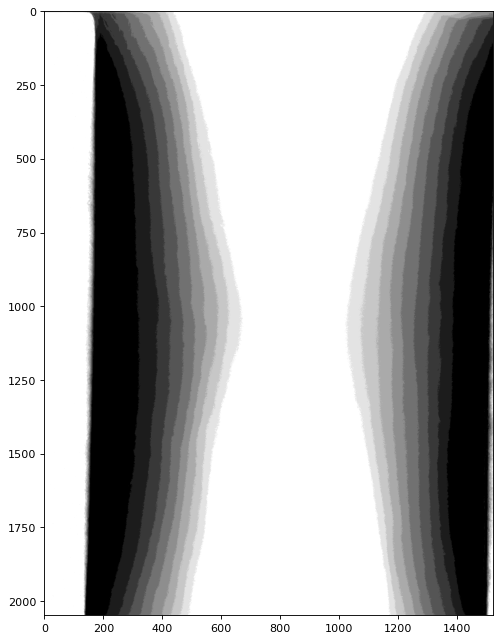

In [99]:
figure(figsize=(10, 10), dpi=80)
plt.imshow(combine_indices, cmap='gray')

In [100]:
new_images = np.zeros(shape=(2048, 1520, 28))

In [101]:
for row in range(combine_indices.shape[0]):
    for col in range(combine_indices.shape[1]):
        index = combine_indices[row][col]
        pix_values = all_images[index,:,row,col]
        new_images[row][col] = pix_values

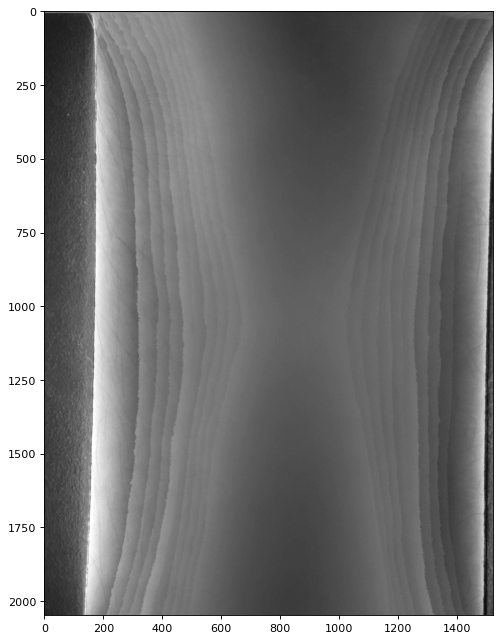

In [116]:
figure(figsize=(10, 10), dpi=80)
plt.imshow(new_images[:,:,4], cmap='gray')